In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False

# 读取处理后的数据
df = pd.read_csv('processed_imo_data.csv')

# 1. 题目难度基础分析
print("1. 题目难度基础分析")
print("-" * 50)

# 计算每道题的基本统计量
problem_stats = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].agg(['mean', 'std', 'min', 'max']).round(2)
print("\n题目得分统计：")
print(problem_stats)

# 计算零分率和满分率
zero_rates = (df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']] == 0).mean() * 100
full_rates = (df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']] == 7).mean() * 100

print("\n各题零分率和满分率：")
print(pd.DataFrame({
    '零分率(%)': zero_rates.round(2),
    '满分率(%)': full_rates.round(2)
}))

# 可视化题目难度分布
plt.figure(figsize=(15, 5))

# 得分分布箱线图
plt.subplot(1, 3, 1)
sns.boxplot(data=df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']])
plt.title('各题得分分布')
plt.xlabel('题目编号')
plt.ylabel('得分')

# 零分率和满分率对比
plt.subplot(1, 3, 2)
width = 0.35
x = np.arange(6)
plt.bar(x - width/2, zero_rates, width, label='零分率')
plt.bar(x + width/2, full_rates, width, label='满分率')
plt.title('各题零分率和满分率对比')
plt.xlabel('题目编号')
plt.ylabel('比例(%)')
plt.xticks(x, ['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
plt.legend()

# 平均分对比
plt.subplot(1, 3, 3)
problem_stats.loc['mean'].plot(kind='bar')
plt.title('各题平均分对比')
plt.xlabel('题目编号')
plt.ylabel('平均分')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. 难度时间趋势分析
print("\n2. 难度时间趋势分析")
print("-" * 50)

# 计算历年题目平均分
yearly_scores = df.groupby('year')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean()

plt.figure(figsize=(12, 6))
yearly_scores.plot(marker='o')
plt.title('历年各题平均分趋势')
plt.xlabel('年份')
plt.ylabel('平均分')
plt.legend(title='题目')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 题目相关性分析
print("\n3. 题目相关性分析")
print("-" * 50)

# 计算题目间相关系数
corr_matrix = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].corr().round(3)
print("\n题目相关系数矩阵：")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('题目相关性热力图')
plt.tight_layout()
plt.show()

# 4. 难度分组分析
print("\n4. 难度分组分析")
print("-" * 50)

# 根据平均分对题目进行难度分组
mean_scores = problem_stats.loc['mean']
difficulty_thresholds = {
    '简单': mean_scores[mean_scores >= 4].index.tolist(),
    '中等': mean_scores[(mean_scores >= 2.5) & (mean_scores < 4)].index.tolist(),
    '困难': mean_scores[mean_scores < 2.5].index.tolist()
}

print("\n题目难度分组：")
for difficulty, problems in difficulty_thresholds.items():
    print(f"{difficulty}题目：{', '.join(problems)}")

# 分析不同难度组的得分特征
difficulty_stats = {}
for difficulty, problems in difficulty_thresholds.items():
    if problems:  # 确保该难度组有题目
        stats = df[problems].agg(['mean', 'std', 'min', 'max']).mean()
        difficulty_stats[difficulty] = stats

difficulty_df = pd.DataFrame(difficulty_stats).round(2)
print("\n各难度组统计特征：")
print(difficulty_df)

# 5. 难度与完成时间关系分析
print("\n5. 难度与完成时间关系分析")
print("-" * 50)

# 分析第一天和第二天题目的难度差异
day1_mean = df[['p1', 'p2', 'p3']].mean().mean()
day2_mean = df[['p4', 'p5', 'p6']].mean().mean()

print(f"\n第一天题目平均分：{day1_mean:.2f}")
print(f"第二天题目平均分：{day2_mean:.2f}")

# 可视化两天题目难度对比
plt.figure(figsize=(10, 6))
day_scores = pd.DataFrame({
    '第一天': df[['p1', 'p2', 'p3']].values.flatten(),
    '第二天': df[['p4', 'p5', 'p6']].values.flatten()
})
sns.boxplot(data=day_scores)
plt.title('两天题目得分分布对比')
plt.ylabel('得分')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


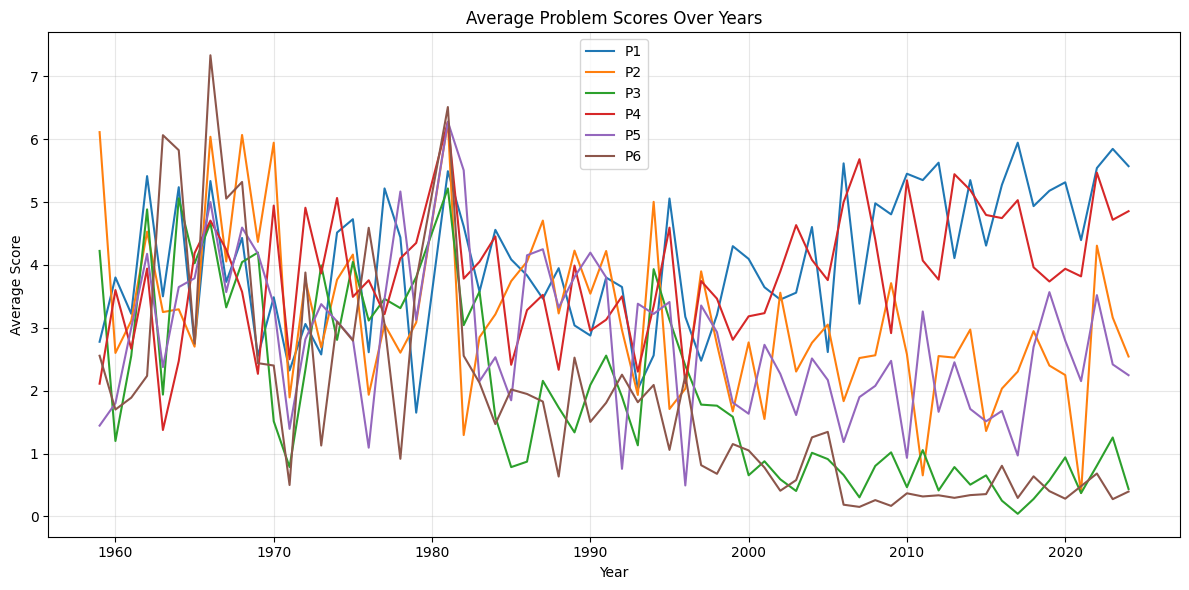

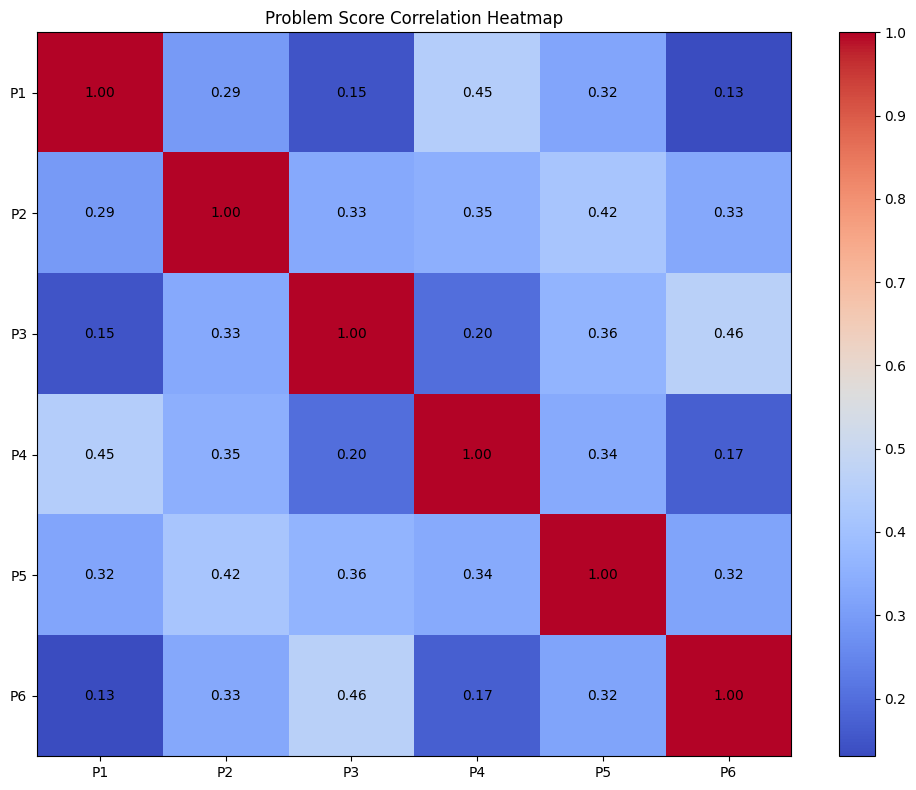

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init()

import matplotlib
matplotlib.rcParams['font.family'] = 'Source Han Sans CN'
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('individual_results_df.csv')

# 1. 题目难度趋势分析
yearly_problem_scores = df.groupby('year')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean()

plt.figure(figsize=(12, 6))
for col in yearly_problem_scores.columns:
    plt.plot(yearly_problem_scores.index, yearly_problem_scores[col], label=f'题目{col[1]}')
plt.title('各题目平均分随年份变化')
plt.xlabel('年份')
plt.ylabel('平均分')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 题目相关性分析
problem_corr = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].corr()

plt.figure(figsize=(10, 8))
plt.imshow(problem_corr, cmap='coolwarm', aspect='auto')
plt.colorbar(label='相关系数')
plt.xticks(range(6), [f'题目{i+1}' for i in range(6)])
plt.yticks(range(6), [f'题目{i+1}' for i in range(6)])
plt.title('题目得分相关性热力图')

for i in range(6):
    for j in range(6):
        plt.text(j, i, f'{problem_corr.iloc[i, j]:.2f}', 
                ha='center', va='center')
plt.tight_layout()
plt.show()

# 3. 不同奖项的题目表现分析
award_problem_scores = df.groupby('award')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean()

plt.figure(figsize=(12, 6))
award_problem_scores.plot(kind='bar')
plt.title('不同奖项的题目得分情况')
plt.xlabel('奖项')
plt.ylabel('平均分')
plt.legend(title='题目编号')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 题目完成率分析
completion_rate = (df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']] > 0).mean() * 100

plt.figure(figsize=(10, 6))
completion_rate.plot(kind='bar')
plt.title('各题目完成率')
plt.xlabel('题目编号')
plt.ylabel('完成率(%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 日期难度对比分析
df['first_day_avg'] = df[['p1', 'p2', 'p3']].mean(axis=1)
df['second_day_avg'] = df[['p4', 'p5', 'p6']].mean(axis=1)

plt.figure(figsize=(10, 6))
plt.boxplot([df['first_day_avg'], df['second_day_avg']], labels=['第一天', '第二天'])
plt.title('两天考试难度对比')
plt.ylabel('平均分')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 输出统计信息
print('\n两天考试难度统计：')
day_stats = pd.DataFrame({
    '第一天': df['first_day_avg'].describe(),
    '第二天': df['second_day_avg'].describe()
}).round(2)
print(day_stats)
